In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import os
root_dir = '/mnt/c/Users/aluca/Desktop/relatorio_ML/imagens/train_data/'

data_raw = {}
for model in ['rnn', 'vggrnn', 'transformer']:
    for t in ['train', 'val']:
        for metric in ['acc', 'lossatt', 'lossctc', 'losstotal']:
            for token in ['char', 'bpe']:
                tag = model+'_'+metric+'_'+t+'_'+token
                with open(root_dir+tag+'.json') as f:
                    x = []
                    y = []
                    for item in json.load(f):
                        _,xx,yy=item
                        x.append(xx)
                        y.append(yy)
                    
                    data_raw[tag] = (x,y)

In [10]:
data_raw.keys()

dict_keys(['rnn_acc_train_char', 'rnn_acc_train_bpe', 'rnn_lossatt_train_char', 'rnn_lossatt_train_bpe', 'rnn_lossctc_train_char', 'rnn_lossctc_train_bpe', 'rnn_losstotal_train_char', 'rnn_losstotal_train_bpe', 'rnn_acc_val_char', 'rnn_acc_val_bpe', 'rnn_lossatt_val_char', 'rnn_lossatt_val_bpe', 'rnn_lossctc_val_char', 'rnn_lossctc_val_bpe', 'rnn_losstotal_val_char', 'rnn_losstotal_val_bpe', 'vggrnn_acc_train_char', 'vggrnn_acc_train_bpe', 'vggrnn_lossatt_train_char', 'vggrnn_lossatt_train_bpe', 'vggrnn_lossctc_train_char', 'vggrnn_lossctc_train_bpe', 'vggrnn_losstotal_train_char', 'vggrnn_losstotal_train_bpe', 'vggrnn_acc_val_char', 'vggrnn_acc_val_bpe', 'vggrnn_lossatt_val_char', 'vggrnn_lossatt_val_bpe', 'vggrnn_lossctc_val_char', 'vggrnn_lossctc_val_bpe', 'vggrnn_losstotal_val_char', 'vggrnn_losstotal_val_bpe', 'transformer_acc_train_char', 'transformer_acc_train_bpe', 'transformer_lossatt_train_char', 'transformer_lossatt_train_bpe', 'transformer_lossctc_train_char', 'transformer_

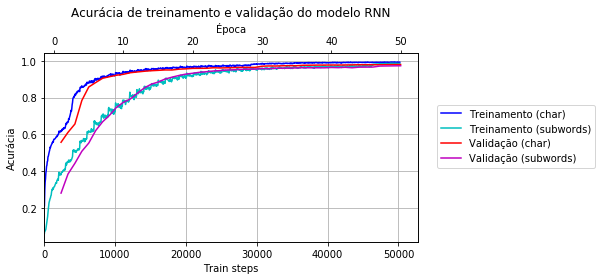

In [11]:
fig, ax1 = plt.subplots()
ax1.set_title('Acurácia de treinamento e validação do modelo RNN')
ax1.plot(data_raw['rnn_acc_train_char'][0],data_raw['rnn_acc_train_char'][1], label='Treinamento (char)', color='b' )
ax1.plot(data_raw['rnn_acc_train_bpe'][0],data_raw['rnn_acc_train_bpe'][1], label='Treinamento (subwords)', color='c' )
ax1.set_xlabel('Train steps')
ax1.set_ylabel('Acurácia')
ax2 = ax1.twiny()
ax2.plot(data_raw['rnn_acc_val_char'][0],data_raw['rnn_acc_val_char'][1], label='Validação (char)', color='r')
ax2.plot(data_raw['rnn_acc_val_bpe'][0],data_raw['rnn_acc_val_bpe'][1], label='Validação (subwords)', color='m')

ax2.set_xlabel('Época')
ax2.set_ylabel('Acurácia')  # we already handled the x-label with ax1
lgd = fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
fig.show()
ax1.grid()
ax1.set_xlim(xmin=0)
fig.savefig(root_dir+'acc_rnn.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

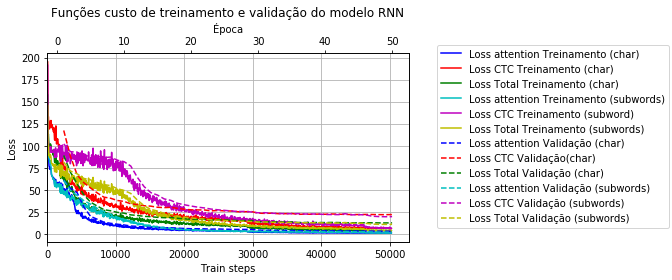

In [12]:
fig, ax1 = plt.subplots()
ax1.set_title('Funções custo de treinamento e validação do modelo RNN')
ax1.plot(data_raw['rnn_lossatt_train_char'][0],data_raw['rnn_lossatt_train_char'][1], 'b-', label='Loss attention Treinamento (char)')
ax1.plot(data_raw['rnn_lossctc_train_char'][0],data_raw['rnn_lossctc_train_char'][1],'r-', label='Loss CTC Treinamento (char)')
ax1.plot(data_raw['rnn_losstotal_train_char'][0],data_raw['rnn_losstotal_train_char'][1],'g-', label='Loss Total Treinamento (char)')
ax1.plot(data_raw['rnn_lossatt_train_bpe'][0],data_raw['rnn_lossatt_train_bpe'][1], 'c-', label='Loss attention Treinamento (subwords)')
ax1.plot(data_raw['rnn_lossctc_train_bpe'][0],data_raw['rnn_lossctc_train_bpe'][1],'m-', label='Loss CTC Treinamento (subword)')
ax1.plot(data_raw['rnn_losstotal_train_bpe'][0],data_raw['rnn_losstotal_train_bpe'][1],'y-', label='Loss Total Treinamento (subwords)')

ax1.set_xlabel('Train steps')
ax1.set_ylabel('Loss')

ax2 = ax1.twiny()

ax2.plot(data_raw['rnn_lossatt_val_char'][0],data_raw['rnn_lossatt_val_char'][1],'b--', label='Loss attention Validação (char)'  )
ax2.plot(data_raw['rnn_lossctc_val_char'][0],data_raw['rnn_lossctc_val_char'][1], 'r--',label='Loss CTC Validação(char)')
ax2.plot(data_raw['rnn_losstotal_val_char'][0],data_raw['rnn_losstotal_val_char'][1], 'g--',label='Loss Total Validação (char)')
ax2.plot(data_raw['rnn_lossatt_val_bpe'][0],data_raw['rnn_lossatt_val_bpe'][1],'c--', label='Loss attention Validação (subwords)'  )
ax2.plot(data_raw['rnn_lossctc_val_bpe'][0],data_raw['rnn_lossctc_val_bpe'][1], 'm--',label='Loss CTC Validação (subwords)')
ax2.plot(data_raw['rnn_losstotal_val_bpe'][0],data_raw['rnn_losstotal_val_bpe'][1], 'y--',label='Loss Total Validação (subwords)')
ax2.set_xlabel('Época')
ax2.set_ylabel('Acc')  # we already handled the x-label with ax1
lgd = fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
fig.show()
ax1.grid()
ax1.set_xlim(xmin=0)
fig.savefig(root_dir+'losses_rnn.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

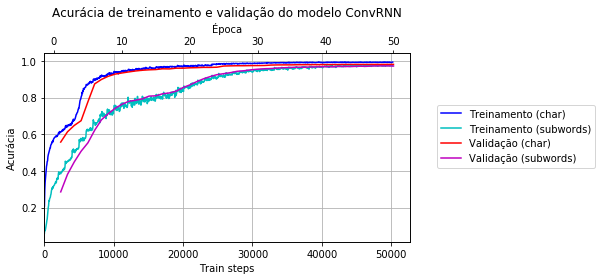

In [13]:
fig, ax1 = plt.subplots()
ax1.set_title('Acurácia de treinamento e validação do modelo ConvRNN')
ax1.plot(data_raw['vggrnn_acc_train_char'][0],data_raw['vggrnn_acc_train_char'][1], label='Treinamento (char)', color='b' )
ax1.plot(data_raw['vggrnn_acc_train_bpe'][0],data_raw['vggrnn_acc_train_bpe'][1], label='Treinamento (subwords)', color='c' )

ax1.set_xlabel('Train steps')
ax1.set_ylabel('Acurácia')
ax2 = ax1.twiny()
ax2.plot(data_raw['vggrnn_acc_val_char'][0],data_raw['vggrnn_acc_val_char'][1], label='Validação (char)', color='r')
ax2.plot(data_raw['vggrnn_acc_val_bpe'][0],data_raw['vggrnn_acc_val_bpe'][1], label='Validação (subwords)', color='m')
ax2.set_xlabel('Época')
ax2.set_ylabel('Acurácia')  # we already handled the x-label with ax1
lgd = fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
fig.show()
ax1.grid()
ax1.set_xlim(xmin=0)
fig.savefig(root_dir+'acc_vggrnn.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

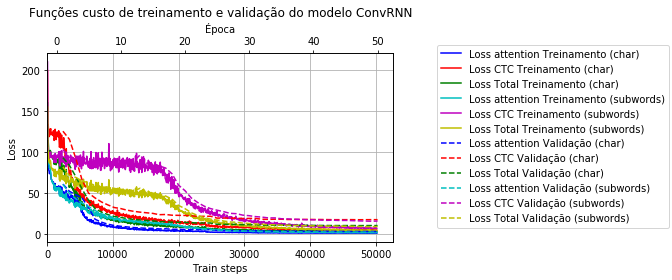

In [14]:
fig, ax1 = plt.subplots()
ax1.set_title('Funções custo de treinamento e validação do modelo ConvRNN')
ax1.plot(data_raw['vggrnn_lossatt_train_char'][0],data_raw['vggrnn_lossatt_train_char'][1], 'b-', label='Loss attention Treinamento (char)')
ax1.plot(data_raw['vggrnn_lossctc_train_char'][0],data_raw['vggrnn_lossctc_train_char'][1],'r-', label='Loss CTC Treinamento (char)')
ax1.plot(data_raw['vggrnn_losstotal_train_char'][0],data_raw['vggrnn_losstotal_train_char'][1],'g-', label='Loss Total Treinamento (char)')
ax1.plot(data_raw['vggrnn_lossatt_train_bpe'][0],data_raw['vggrnn_lossatt_train_bpe'][1], 'c-', label='Loss attention Treinamento (subwords)')
ax1.plot(data_raw['vggrnn_lossctc_train_bpe'][0],data_raw['vggrnn_lossctc_train_bpe'][1],'m-', label='Loss CTC Treinamento (subwords)')
ax1.plot(data_raw['vggrnn_losstotal_train_bpe'][0],data_raw['vggrnn_losstotal_train_bpe'][1],'y-', label='Loss Total Treinamento (subwords)')


ax1.set_xlabel('Train steps')
ax1.set_ylabel('Loss')

ax2 = ax1.twiny()

ax2.plot(data_raw['vggrnn_lossatt_val_char'][0],data_raw['vggrnn_lossatt_val_char'][1],'b--', label='Loss attention Validação (char)'  )
ax2.plot(data_raw['vggrnn_lossctc_val_char'][0],data_raw['vggrnn_lossctc_val_char'][1], 'r--',label='Loss CTC Validação (char)')
ax2.plot(data_raw['vggrnn_losstotal_val_char'][0],data_raw['vggrnn_losstotal_val_char'][1], 'g--',label='Loss Total Validação (char)')
ax2.plot(data_raw['vggrnn_lossatt_val_bpe'][0],data_raw['vggrnn_lossatt_val_bpe'][1],'c--', label='Loss attention Validação (subwords)'  )
ax2.plot(data_raw['vggrnn_lossctc_val_bpe'][0],data_raw['vggrnn_lossctc_val_bpe'][1], 'm--',label='Loss CTC Validação (subwords)')
ax2.plot(data_raw['vggrnn_losstotal_val_bpe'][0],data_raw['vggrnn_losstotal_val_bpe'][1], 'y--',label='Loss Total Validação (subwords)')

ax2.set_xlabel('Época')
ax2.set_ylabel('Acc')  # we already handled the x-label with ax1
lgd = fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
fig.show()
ax1.grid()
ax1.set_xlim(xmin=0)
fig.savefig(root_dir+'losses_vggrnn.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

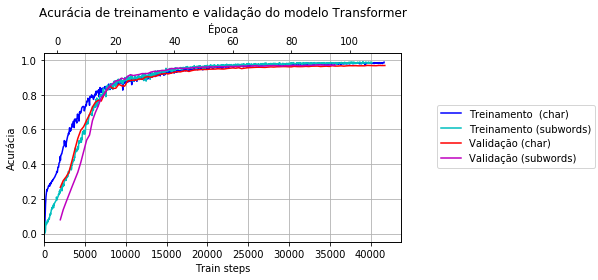

In [15]:
fig, ax1 = plt.subplots()
ax1.set_title('Acurácia de treinamento e validação do modelo Transformer')
ax1.plot(data_raw['transformer_acc_train_char'][0],data_raw['transformer_acc_train_char'][1], label='Treinamento  (char)', color='b' )
ax1.plot(data_raw['transformer_acc_train_bpe'][0],data_raw['transformer_acc_train_bpe'][1], label='Treinamento (subwords)', color='c' )

ax1.set_xlabel('Train steps')
ax1.set_ylabel('Acurácia')
ax2 = ax1.twiny()
ax2.plot(data_raw['transformer_acc_val_char'][0],data_raw['transformer_acc_val_char'][1], label='Validação (char)', color='r')
ax2.plot(data_raw['transformer_acc_val_bpe'][0],data_raw['transformer_acc_val_bpe'][1], label='Validação (subwords)', color='m')
ax2.set_xlabel('Época')
ax2.set_ylabel('Acurácia')  # we already handled the x-label with ax1
lgd = fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
fig.show()
ax1.grid()
ax1.set_xlim(xmin=0)
fig.savefig(root_dir+'acc_transformer.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

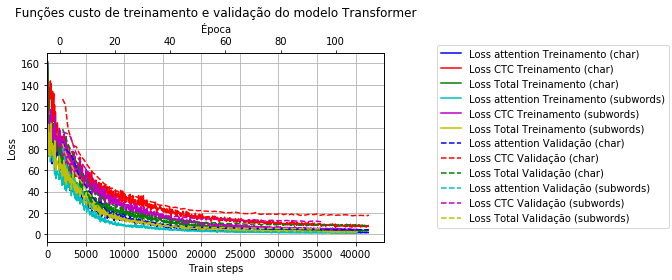

In [16]:
fig, ax1 = plt.subplots()
ax1.set_title('Funções custo de treinamento e validação do modelo Transformer')
ax1.plot(data_raw['transformer_lossatt_train_char'][0],data_raw['transformer_lossatt_train_char'][1], 'b-', label='Loss attention Treinamento (char)')
ax1.plot(data_raw['transformer_lossctc_train_char'][0],data_raw['transformer_lossctc_train_char'][1],'r-', label='Loss CTC Treinamento (char)')
ax1.plot(data_raw['transformer_losstotal_train_char'][0],data_raw['transformer_losstotal_train_char'][1],'g-', label='Loss Total Treinamento (char)')
ax1.plot(data_raw['transformer_lossatt_train_bpe'][0],data_raw['transformer_lossatt_train_bpe'][1], 'c-', label='Loss attention Treinamento (subwords)')
ax1.plot(data_raw['transformer_lossctc_train_bpe'][0],data_raw['transformer_lossctc_train_bpe'][1],'m-', label='Loss CTC Treinamento (subwords)')
ax1.plot(data_raw['transformer_losstotal_train_bpe'][0],data_raw['transformer_losstotal_train_bpe'][1],'y-', label='Loss Total Treinamento (subwords)')

ax1.set_xlabel('Train steps')
ax1.set_ylabel('Loss')

ax2 = ax1.twiny()

ax2.plot(data_raw['transformer_lossatt_val_char'][0],data_raw['transformer_lossatt_val_char'][1],'b--', label='Loss attention Validação (char)'  )
ax2.plot(data_raw['transformer_lossctc_val_char'][0],data_raw['transformer_lossctc_val_char'][1], 'r--',label='Loss CTC Validação (char)')
ax2.plot(data_raw['transformer_losstotal_val_char'][0],data_raw['transformer_losstotal_val_char'][1], 'g--',label='Loss Total Validação (char)')
ax2.plot(data_raw['transformer_lossatt_val_bpe'][0],data_raw['transformer_lossatt_val_bpe'][1],'c--', label='Loss attention Validação (subwords)'  )
ax2.plot(data_raw['transformer_lossctc_val_bpe'][0],data_raw['transformer_lossctc_val_bpe'][1], 'm--',label='Loss CTC Validação (subwords)')
ax2.plot(data_raw['transformer_losstotal_val_bpe'][0],data_raw['transformer_losstotal_val_bpe'][1], 'y--',label='Loss Total Validação (subwords)')

ax2.set_xlabel('Época')
ax2.set_ylabel('Acc')  # we already handled the x-label with ax1
lgd = fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
fig.show()
ax1.grid()
ax1.set_xlim(xmin=0)
fig.savefig(root_dir+'losses_transformer.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [17]:
root_dir = '/mnt/c/Users/aluca/Desktop/relatorio_ML/imagens/train_data/'

lr_data = {}
for model_type in ['rnn', 'vggrnn', 'transformer']:
    for token_type in ['char' , 'bpe']:
        with open(root_dir+model_type+'_lr0_'+token_type+'.json') as f:
            x = []
            y = []
            tag = model_type+'_lr0_'+token_type
            for item in json.load(f):
                _,xx,yy=item
                x.append(xx)
                y.append(yy)

            lr_data[tag]  = (x,y)

In [18]:
lr_data.keys()


dict_keys(['rnn_lr0_char', 'rnn_lr0_bpe', 'vggrnn_lr0_char', 'vggrnn_lr0_bpe', 'transformer_lr0_char', 'transformer_lr0_bpe'])

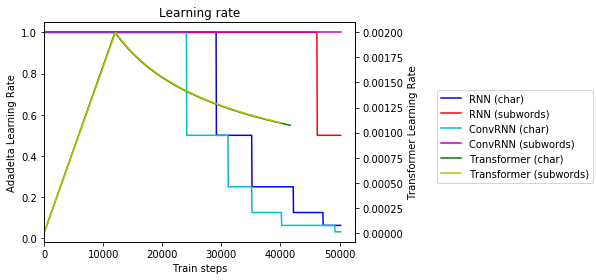

In [19]:
fig, ax1 = plt.subplots()
ax1.set_title('Learning rate')

ax1.plot(lr_data['rnn_lr0_char'][0],lr_data['rnn_lr0_char'][1], 'b', label= "RNN (char)")
ax1.plot(lr_data['rnn_lr0_bpe'][0],lr_data['rnn_lr0_bpe'][1], 'r' , label= "RNN (subwords)")
ax1.plot(lr_data['vggrnn_lr0_char'][0],lr_data['vggrnn_lr0_char'][1], 'c', label= "ConvRNN (char)")
ax1.plot(lr_data['vggrnn_lr0_bpe'][0],lr_data['vggrnn_lr0_bpe'][1], 'm', label= "ConvRNN (subwords)")
ax1.set_xlabel('Train steps')
ax1.set_ylabel('Adadelta Learning Rate')

ax2 = ax1.twinx()
ax2.plot(lr_data['transformer_lr0_char'][0],lr_data['transformer_lr0_char'][1], 'g', label='Transformer (char)')
ax2.plot(lr_data['transformer_lr0_bpe'][0],lr_data['transformer_lr0_bpe'][1], 'y',  label='Transformer (subwords)')
ax2.set_ylabel('Transformer Learning Rate')

lgd = fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
fig.show()
ax1.set_xlim(xmin=0)
fig.savefig(root_dir+'lr.png', bbox_extra_artists=(lgd,), bbox_inches='tight')